<a href="https://colab.research.google.com/github/Coyote-Schmoyote/abalone-age-prediction/blob/main/abalone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Abalone Project

### 1. Problem Definition
Predict the age (number of rings) of abalone mollusks based on the attributes. 

### 2. Data
The data is downloaded from the Kaggle Abalone Dataset: https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset 

The dataset was donated in 1995 by S. Waugh, University of Tasmania. It is originally based on a study "The Population Biology of Abalone in Tasmania" by N. J. Wawick, T. L. Sellers, S. R. Talbot, A. J. Cawthorn and W. B. Ford (1994).
The original dataset can be found here: https://archive.ics.uci.edu/ml/datasets/abalone 

### 3. Evaluation

### 4. Features
The data consists of 9 features:
* Sex (M-Male, F-Female, I-Infant)
* Length (longest shell measurement)
* Diameter (perpendicular to length)
* Height (with meat in shell)
* Whole weight (swhole abalone)
* Shucked weight (weight of meat)
* Viscera weight (gut weight after bleeding)
* Shell weight (after being dried)
* Rings (+1.5 gives the age in years)



In [182]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 

# Data Exploration
First, let us explore the data and get more familiar with it

In [183]:
#import data
data = pd.read_csv("drive/MyDrive/ml-projects/abalone-project/data/abalone.csv")

In [184]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [186]:
# Check for missing values
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

## Visualizing the data
To understand better our data, it is a good idea to visualize it. We can follow our instincts. In this case, I have a hunch that sex, diameter, and whole weight can be important for determining abalone mollusks‘ age.

#### Matplotlib library
For data visualization, we use the matplotlib library. We already imported it as `plt` in the beginning of this notebook. 

**Code**
When making a plot, we have two core objects: `fig` (short for figure) and `ax` (short for axes). 
* `fig` is like a frame, which we can resize and reshape, but we cannot draw on it.
* `ax` (also called subplot) is the canvas. We can have many subplots in one figure. 
* `bar`, `barh`, `pie`, and `scatter` are some of the examples of plot types in matplotlib. More information here: https://matplotlib.org/3.5.0/api/axes_api.html 

#### Sex and Rings columns bar chart
`bar` charts are used to compare things between differnt groups. Here, we want to compare 3 different groups: female, male, and infant abalones, and the number of rings each group has.

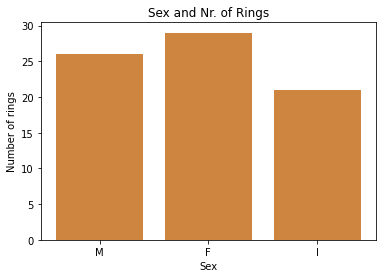

In [187]:
# Create the fig, ax
fig, ax = plt.subplots()

# Create bar plot of first 1000 data entries 
ax.bar(data["Sex"][:1000], data["Rings"][:1000], color="peru")

#Add legend: x is horizonatal axis, y is vertical
ax.set(title="Sex and Nr. of Rings", 
       xlabel="Sex",
       ylabel="Number of rings");

### Diameter and Rings scatter plot
`scatter` plots are used to determine wheter two variables have a relationship or not. Here, I want to see if diameter and number or rings mean something together.

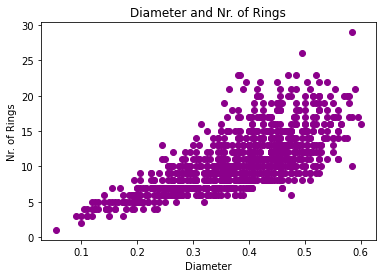

In [188]:
# Create a fig, ax
fig, ax = plt.subplots()

# Create a scatter plot with first 1000 data points
ax.scatter(data["Diameter"][:1000], data["Rings"][:1000], color="darkmagenta")

# Create a legend
ax.set(title="Diameter and Nr. of Rings",
       xlabel="Diameter",
       ylabel="Nr. of Rings");

### Whole weight and nr. of rings scatter plot
In this scatter plot, I am trying to find a relationship between the whole weight of an abalone mollusk, and its number of rings.

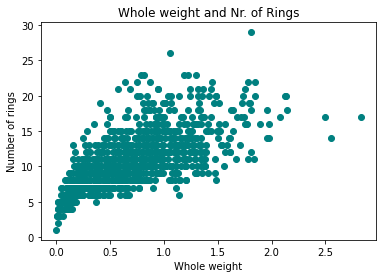

In [189]:
# Create fig, ax
fig, ax = plt.subplots()

# Create scatter plot of first 1000 data points
ax.scatter(data["Whole weight"][:1000], data["Rings"][:1000], color="teal")

#Create a legend
ax.set(title="Whole weight and Nr. of Rings",
       xlabel="Whole weight",
       ylabel="Number of rings");

### We can also plot all of these subplots together in one figure, to have a better comparison.

We can do it using `ncols` (number of columns) and `nrows` (number of rows) parameters.

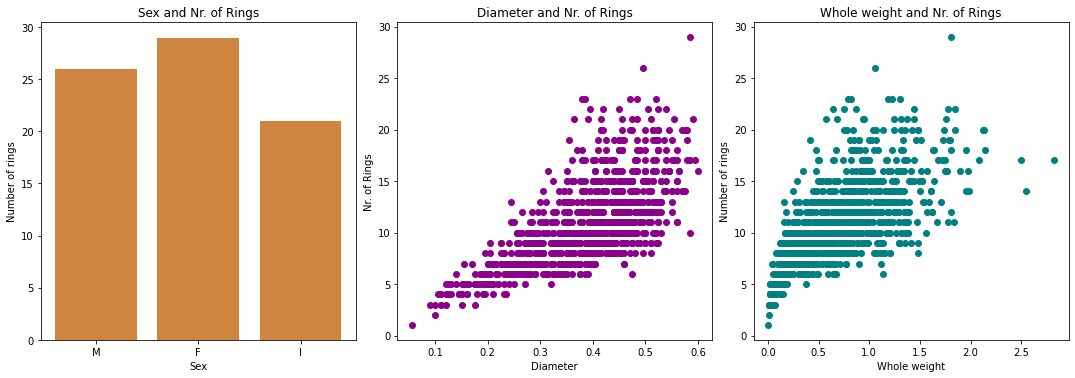

In [190]:
# Create a fig, ax

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout()  #makes the columns more spaced out

#Sex and nr. of Rings
ax1.bar(data["Sex"][:1000], data["Rings"][:1000], color="peru")
ax1.set(title="Sex and Nr. of Rings", 
       xlabel="Sex",
       ylabel="Number of rings")

# Diameter and nr. of Rings
ax2.scatter(data["Diameter"][:1000], data["Rings"][:1000], color="darkmagenta")
ax2.set(title="Diameter and Nr. of Rings",
       xlabel="Diameter",
       ylabel="Nr. of Rings")

# Whole weight and nr. of Rings
ax3.scatter(data["Whole weight"][:1000], data["Rings"][:1000], color="teal")
ax3.set(title="Whole weight and Nr. of Rings",
       xlabel="Whole weight",
       ylabel="Number of rings");

**Conclusion** : We can see from the data visualization that in general, the bigger the diameter and the weight of an abalone mollusk, the more likely it is to have more rings (and be older). There is also a slight tendency for female mollusks to live longer than male mollusks.

>Bonus → List of colors in matplotlib: https://matplotlib.org/3.5.0/gallery/color/named_colors.html

## Data modelling

Before we start building a macine learning model, we need to adjust our data. What we need to do:
* Make sure there are no missing values
* Make sure all our data is numerical
* Create age column: nr. of rings + 1.5



In [191]:
# Check for missing values
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Ok, we have no missing values. That‘s good! Now we can move on to step 2:
* Make sure all our data is numerical.
At the most basic level, machines only understand numbers. So for us to build a machine learning model, we need to convert any non-numerical categories to numbers. In this case, our only non-numerical category is sex. The datatype of sex column is `object`.

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Another way to check which columns are not numbers is through using a `pandas` function in a for loop:

In [193]:
# Check which columns have string values
for label, content in data.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Sex


Sex column has 3 genders: female (F)、male (M), and infant (I). In other words, there are 3 categories. In `pandas`, we have a datatype `category`, which will convert these 3 categories into numbers.
To do that, we can use `pandas` method `astype()` to convert the string columns to a numerical category. 
More about `astype` method: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html 



In [194]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [195]:
data["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [196]:
data["Sex"] = data["Sex"].astype("category").cat.as_ordered()

In [197]:
# Turn categorical variables into numbers
for label, content in data.items():
  if not pd.api.types.is_numeric_dtype(content):
    data[label] = pd.Categorical(content).codes

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int8   
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), int8(1)
memory usage: 265.3 KB


As we can see, now the datatype of sex column is `integer`.
Let‘s see how our data changed by using `cat.codes` to see which numbers were assigned to each category (F, M, and I), and then let‘s use `cat.categories` to see the original names of the categories.

In [199]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Our original task was to determine the age of the abalone mollusks based on the number of their rings. We know that age is determined by the numebr of rings + 1.5. Therefore, we need to create a new column ["Age"] in our data.

In [200]:
# Add age column
data["Age"] = data["Rings"] + 1.5

# Drop rings column

data.drop("Rings", axis=1, inplace=True) #axis=1 means that we will delete the whole column
                                         #inplace=True means that this change will be saved

In [201]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## Building a machine learning model
To build a machine learning model, there are several steps we have to make.

* Split data into X (labels) and y (target)
> X refers to all the variables that the machine model uses to make a prediction. In our case, X labels include `sex`, `length`, `diameter`, `height` ets. Y, on the other hand, refers to a target variable, or the correct answer. In our case, the correct answer (what the macine is supposed to predict) is `age`.

* Split data into test and train sets
> Essentially, we train the model on train set (about 80% of the data), and then we see how well it can predict the target variable (in our case, age) on the remaining 20% of data. To split the data, we are using a `scikit-learn` module `train_test_split` 

* Select a machine learning model 
> Different machine learning models are suitable for different problems. In supervised learning, there are two types of machine learning problems: classification and regression. We are dealing with a regression problem, because we need to predict a number. We can use this map to help us choose the right machine learning model: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

In [202]:
# Split data into X and y
X = data.drop("Age", axis=1)
y = data["Age"]

In [203]:
X[:20]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320


In [204]:
y[:20]

0     16.5
1      8.5
2     10.5
3     11.5
4      8.5
5      9.5
6     21.5
7     17.5
8     10.5
9     20.5
10    15.5
11    11.5
12    12.5
13    11.5
14    11.5
15    13.5
16     8.5
17    11.5
18     8.5
19    10.5
Name: Age, dtype: float64

Now we can split data into train and test sets. 

In [205]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=14)

In [206]:
len(X_train), len(y_train), len(X_test), len(y_test)

(3341, 3341, 836, 836)

## Choosing a machine learning model

Now that the data is split into train and test, let‘s try to build a machine learning model. We will try a `RandomForestRegressor`. 

#### Random Forest Regressor
Random Forest Regressor is a machine learning model based on a forest of decision-trees, and can be used for both classifiaction and regression problems.

In [207]:
# import model
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor(n_jobs=-1,
                           random_state=14)

# fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

## Evaluation 

Now that we fit our model, we need to evaluate how well did it perform. There are different evaluation criterion for classification and regression models. The most common ways to evaluate a regression model are:
* Mean Absolute Error (MAE)
> Measures the average magnitude of the errors in predictions, without considering their direction. In other words, MAE → actual answer - predicted answer. The lower the value, the better.
* Mean Square Error (MSE)
> Shows how close a regression line is to a set of points. The lower the MSE, the better.
* Root Mean Square Error (RMSE)
> RMSE is used to return the MSE error to the original unit by taking the square root of it.


In [209]:
rf.score(X_train, y_train)

0.9357057341721267

In [210]:
# Create evaluation function
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

def show_score(model):
  train_preds= model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
            "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds))}
  return scores

In [211]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [212]:
show_score(rf)

{'Test MAE': 1.5157296650717704,
 'Test MSE': 0.024190290175117212,
 'Test RMSE': 0.1555322801707646,
 'Training MAE': 0.5804040706375337,
 'Training MSE': 0.0034025564104252833,
 'Training RMSE': 0.05833143586802303}

We can see that the error in test sets is higher than in training sets. This is good, because when the machine model makes predictions based on training set, it already learnt the correct answer. At the same time, the error in test sets is higher, because the model doesn‘t know the answers to the test data. We can visualize the actual answers with the predicted ones, to see the error more clearly.

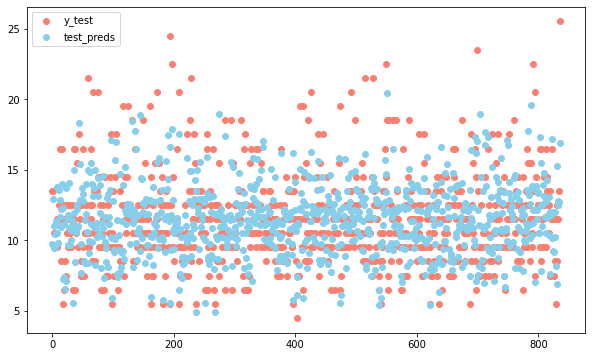

In [215]:
# Predict the labels on test data
test_preds = rf.predict(X_test) 

# Visualize predictions vs true labels
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), test_preds, color="skyblue", label="test_preds")
plt.legend();

## Hyperparameter tuning
We can see that our model did pretty good. However, we can make it even better by tuning some of the hyperparameters in our model. 

In [ ]:
from pprint import pprint

print("Current parameters:")
pprint(rf.get_params())

Current parameters:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 14,
 'verbose': 0,
 'warm_start': False}


Let us try a bunch of different hyperparameters in a RandomizedSearchCV grid

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(5, 10, 100),
           "max_depth":[None, 3, 4, 10],
           "max_features":["auto", "sqrt"],
           "min_samples_split":[2, 5, 10],
           "min_samples_leaf":[1, 2, 3]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=14),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=4,
                              verbose=True)

rs_model.fit(X_train, y_train)


Fitting 4 folds for each of 72 candidates, totalling 288 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=4,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=14),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 4, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([5])},
                   verbose=True)

In [ ]:
show_score(rs_model)

{'Training General Score': 0.9999328227681767,
 'Training MAE': 0.0029369831765041323,
 'Training RMSE': 0.005981892458214219,
 'Training R^2': 0.9996701817037852,
 'Valid MAE': 0.0016798348636913707,
 'Valid RMSE': 0.0013699189863217924,
 'Valid R^2': 0.99989472922714,
 'Validation General Score': 0.9999884754057997}

In [ ]:
show_score(rf)

{'Training General Score': 0.9999328227681767,
 'Training MAE': 0.0014970059880239528,
 'Training RMSE': 0.005573634235498172,
 'Training R^2': 0.9999328227681767,
 'Valid MAE': 0.0005231689088191351,
 'Valid RMSE': 0.00045687699265186315,
 'Valid R^2': 0.9999884754057997,
 'Validation General Score': 0.9999884754057997}

In [ ]:
# Check most ideal params
rs_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 5}

In [ ]:
# Ideal model 

ideal_model = RandomForestRegressor(max_depth=None,
                                    max_features="auto",
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    n_estimators=5)
# Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=5, n_estimators=5)

In [ ]:
show_score(ideal_model)

{'Training General Score': 0.9999328227681767,
 'Training MAE': 0.0015450349301397227,
 'Training RMSE': 0.0036687155892114022,
 'Training R^2': 0.9998206787475802,
 'Valid MAE': 9.965122072745886e-05,
 'Valid RMSE': 7.58871116703928e-05,
 'Valid R^2': 0.9999996849912751,
 'Validation General Score': 0.9999884754057997}

In [ ]:
# Make predictions on test data
test_preds = ideal_model.predict(X_test)
test_preds [:20], y_test[:20]

(array([12., 12.,  9.,  8.,  9.,  8.,  9.,  8., 10., 10., 10., 11., 11.,
        15., 10.,  7., 15.,  4., 11.,  5.]), 2374    12
 3341    12
 3361     9
 2574     8
 1624     9
 2874     8
 3908     9
 1302     8
 3771    10
 1024    10
 629     10
 890     11
 585     11
 2328    15
 2920    10
 1766     7
 778     15
 4119     4
 648     11
 538      5
 Name: Rings, dtype: int64)

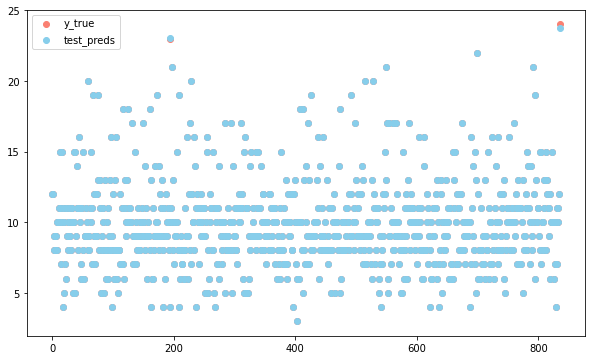

In [ ]:
# Visualize predicted and true values

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_true")
plt.scatter(range(y_test.shape[0]), test_preds, color="skyblue", label="test_preds")
plt.legend();